In [1]:
import numpy as np
np.random.seed(1234)

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def creatData(mod):
    data = []
    ans = []
    for i in range(50000):
        n = np.random.randint(0,16)
        yu = n%mod
        x = np.array([[n%2], [(n>>1)%2], [(n>>2)%2], [(n>>3)%2]])
        data.append(x)
        ans.append(yu)
    return np.array(data), np.array(ans)
    
train_X,train_Y = creatData(3)

In [10]:
print(train_X[:5])
print(train_Y[:5])

[[[0]
  [1]
  [1]
  [1]]

 [[0]
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [0]
  [1]]

 [[0]
  [1]
  [0]
  [0]]

 [[1]
  [0]
  [0]
  [0]]]
[2 2 2 2 1]


In [47]:
n_data = train_X.shape[0]
W = np.random.normal(size=(3, 4))
W2 = np.random.normal(size=(3, 30))

b = np.random.normal(size=(3, 1))
loss_history = []
accuracy_history = []
lr = 0.005
# idx = np.random.choice(n_data, 300, replace=False)
# X = train_X[idx]
# y = train_Y[idx]

In [48]:

for epoch in range(50000):    
    idx = np.random.choice(n_data, 1000, replace=False)
    X = train_X[idx]
    y = train_Y[idx]
    one_y = np.eye(3)[y][..., None]
    #d = np.exp(W @ X + b)
    #d0 = sigmoid(W2 @ W)
    d = sigmoid(W @ X + b)
    #d2 = sigmoid(d @ w2)
    q = d/d.sum(axis=(1,2), keepdims=True)
    loss = -np.log(q[range(len(y)), y]).mean()
    loss_history.append(loss)
    accuracy = (q.argmax(axis=1).ravel() == y).mean()
    accuracy_history.append(accuracy)
    if epoch%500 == 0:
        print(epoch, accuracy, loss)
    grad_b_all = q - one_y
    #grad_b_all = np.array([(np.diag(np.squeeze(g+(-1)))@g) for g in grad_b_all])
    
    grad_b_all = grad_b_all*(grad_b_all+(-1))
    grad_b = grad_b_all.mean(axis=0)
    grad_W_all = grad_b_all @ X.swapaxes(1,2)
    grad_W = grad_W_all.mean(axis=0)
    #grad_b = grad_b_all.mean(axis=0)
    #grad = grad_b_all @ X.swapaxes(1,2)
    #print("grad: ",grad.shape)
    #print("X.swap: ",X.swapaxes(1,2).shape)
    #print("W: ",W.reshape(-1,10,4).shape)
    
    ######
    #grad_W2_all = np.dot(grad,W.swapaxes(0,1),axis=0)
    
    #grad_W2_all = np.array([(g @ W.swapaxes(0,1)) for g in grad])
    #grad_W2_all = grad @ W.swapaxes(0,1)
    
    ######
    #grad_W_all = np.array([(W2.swapaxes(0,1)@g) for g in grad])
    
    #grad_W_all = grad @ W2.swapaxes(0,1)
    #print("grad_w: ",grad_W_all.shape)
    #grad_W = grad_W_all.mean(axis=0)
    #grad_W = grad_W_all
    
    #grad_W = grad_W_all.mean(axis=0)
    #grad_W2 = grad_W2_all.mean(axis=0)
    #W -= grad_W
    #b -= grad_b  
    #W2 -= 0.001*((5001-epoch)/5000)*grad_W2
    W -= 0.001*((5001-epoch)/5000)*grad_W
    #W2 -= 0.1*((5001-epoch)/5000)*grad_W2
    b -= 0.001*((5001-epoch)/5000)*grad_b 
    #print("NO")

0 0.424 1.3030296399453674
500 0.381 1.3446340681346167
1000 0.385 1.415285761994216
1500 0.352 1.593385294190662
2000 0.352 1.7581272286184153
2500 0.383 1.7518930856523076
3000 0.371 1.86452905619786
3500 0.394 1.854125567169267
4000 0.341 1.8999282883808493
4500 0.307 1.9909034930373375
5000 0.312 2.0462849091879733
5500 0.33 2.015241293174729
6000 0.316 2.0421408327053947
6500 0.364 1.943562388936934
7000 0.347 1.887670622933201
7500 0.377 1.7638548519225745
8000 0.364 1.6935223856111614
8500 0.405 1.5027483427661725
9000 0.361 1.4686415103531485
9500 0.356 1.3850046906296158
10000 0.439 1.2650076058451718
10500 0.432 1.2102693709198435
11000 0.371 1.1735918702731252
11500 0.362 1.1393012504299818
12000 0.376 1.1200356123196211
12500 0.358 1.0977078748081595
13000 0.391 1.0738728296776254
13500 0.365 1.089246611506295
14000 0.371 1.081099850754259
14500 0.376 1.0839200305699273
15000 0.447 1.0836629513112535
15500 0.431 1.0855401902799642
16000 0.443 1.0894157366120139
16500 0.433 

In [49]:
print(W)
print(b)

[[27.68315951 27.15405968 28.65772309 26.3388655 ]
 [27.94534116 10.43838942 27.36459252 10.49091451]
 [11.0033248  29.45750436 12.32948992 27.27585985]]
[[52.90144388]
 [39.10518988]
 [38.39242661]]


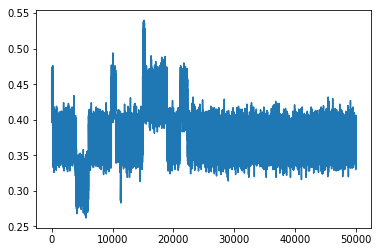

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
# 準確率的圖
plt.plot(accuracy_history);

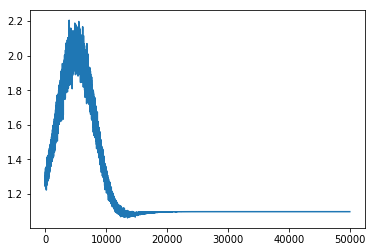

In [51]:
plt.plot(loss_history);

In [52]:
a = np.array([[2,3,4,5]])
si = sigmoid(a.T)

In [19]:
si

array([[0.88079708],
       [0.95257413],
       [0.98201379],
       [0.99330715]])

In [20]:
a.T@(a+(-1))

array([[ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20]])

In [23]:
print(np.diag(a.T))

[2]


In [40]:
a = np.array([1,2,3,4])
d = np.diag(a)
# or simpler: d = np.diag([1,2,3,4])
print(a)
print(d)

[1 2 3 4]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [33]:
a = np.array([[2],[3],[4],[5]])

In [42]:

a = np.squeeze(a)
d = np.diag(a)
print(a)
print(d)

[1 2 3 4]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


array([[2],
       [3],
       [4],
       [5]])